# Анализ оттока клиентов банка


Банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

#### Необходимо:

- Подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставляется ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

- Для визуализации можно использовать любую из изученных библиотек.

- Перед выполнением задания обязательно необходимо продумать, какие признаки в данных являются числовыми, а какие — категориальными.

- При выполнении заданий обязательно придерживайтесь критериев правильной визуализации.


#### Требования к заданию:

- В файле должно содержаться 10 графиков — 10 ответов к заданиям.

- Каждый график и преобразования к нему выполняются в отдельной ячейке.

- Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.


#### Задания

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

> **Подсказка.** Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

```
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

# Подготовка к работе:

In [24]:
# Шаг 1. Импорт библиотек для работы с данными и графиками:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go


# Библиотеки для отображения графиков plotly
# через сайт nbviewer.org
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio

In [25]:
# Шаг 2. Прочитаем файл с данными о банке
churn_data_frame = pd.read_csv('data\churn.csv')

# Шаг 3. Исследуем детальную информации о столбцах таблицы:
churn_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Определенно, что число клиентов банка составляет **10 000 человек**

#### Столбцы таблицы:

- **RowNumber** — номер строки таблицы
- **CustomerId** — идентификатор клиента
- **Surname** — фамилия клиента
- **CreditScore** — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- **Geography** — страна клиента (банк международный)
- **Gender** — пол клиента
- **Age** — возраст клиента
- **Tenure** — сколько лет клиент пользуется услугами банка
- **Balance** — баланс на счетах клиента в банке
- **NumOfProducts** — количество услуг банка, которые приобрёл клиент
- **HasCrCard** — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- **IsActiveMember** — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- **EstimatedSalary** — предполагаемая заработная плата клиента
- **Exited** — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [26]:
# Шаг 4. Исследуем прочитанные данные, и выведем первые 10 строк таблицы:
churn_data_frame.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [27]:
# Шаг 5. Перед редактированием данных делаем копию, чтобы не повредить исходник
# который пригодится для решения некоторых ззадач:
churn_df = churn_data_frame.copy()
# Шаг 6. Удалим лишний столбец, который дублирует индексы:
churn_df.drop(['RowNumber'],axis=1,inplace=True)
# Проверка:
churn_df.head(10)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [28]:
# Шаг 7. Выполним предобработку данных:
# A) Раскроем информацию по статусу активности и лояльности клиента.
# B) Повысим производительность операций совершаемых с наиболее активными столбцами исходя из заданий
# и преобразуем в тип данных category

churn_df['Exited'] = churn_df['Exited'].apply(
    lambda x: 'Departed' if x else 'Loyal').astype('category')


churn_df['IsActiveMember'] = churn_df['IsActiveMember'].apply(
    lambda x: 'Active' if x else 'Not_active').astype('category')

# Проверка преобразования:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  object  
 4   Gender           10000 non-null  object  
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  int64   
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(2), float64(2), int64(6), object(3)
memory usage: 879.3+ KB


# Решение поставленных перед нами задач:

### **Задание 9.1.** 

**Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению?**

In [29]:
# Выполняем подсчет лояльности клиентов и подготавливаем данные к графику:
exited_df = churn_df['Exited'].value_counts().to_frame().rename(index = {'Loyal': 'Лояльные клиенты', 'Departed': 'Ушедшие клиенты'})
# Строим график:
fig = go.Figure(data=[go.Pie(
  values=exited_df['Exited'], # данные полученные предыдущим шагом 
  pull=[0,0.2], # выдвижение наружу куска пирога для Ушедших клиентов
  labels=exited_df.index, # названия индексов для использования их в labels
  rotation=125
  )]
)
# Задаем цвета:
colors = ['yellow', 'firebrick']
fig.update_traces(hoverinfo='value+label', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
# hoverinfo - информация при наведении курсора на кусок пирога, 
# textinfo -  информация на куске пирога,
# textfron_size -  размер текста на пироге
# line - обводка, color - Цвет линии, width - толщина

# Устанавливаем название графика и размеры текста:
fig.update_layout(title_text="Соотношение ушедших и лояльных клиентов", title_font_size=20,
                  legend_font_size=20, width = 800, height=600
                  )

fig.show()



#### Вывод:
Определено, что клиенты численностью **2037** **(20.4%)** человек, приблизительно **1/5** часть клиентов  покинуло банк. При это большая часть клиентов, а именно **7963** клиентов продолжают пользоваться услугами банка. Необходимы дальнейшие исследования для выяснения причин утечки клиентов. 

### **Задание 9.2.** 

**Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

## Вариант графика 1

Количество клиентов с балансом более 2500$: 6381 человек


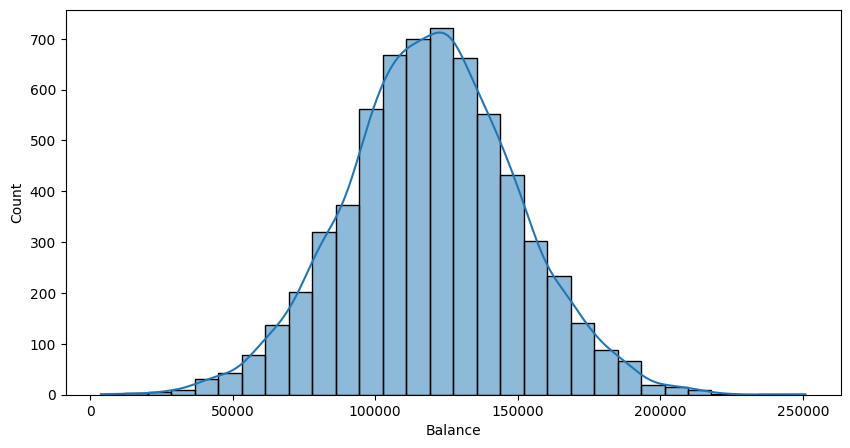

In [30]:
# Устанавливаем условия баланса:
balance_df = churn_df[churn_df['Balance']>2500]
# Определим сколько клиентов имеют баланс более 2500 долларов:
print(f"Количество клиентов с балансом более 2500$: {balance_df['Balance'].nunique()}" ' человек')
# Строим график:
fig=plt.figure(figsize=(10, 5))
sns.histplot(
    data=balance_df,
    x='Balance',
    bins = 30, # кол-во колонок на графике
    kde=True,
);


## Вариант графика 2

In [31]:
# Строим график:
fig = px.histogram(
    balance_df,
    x='Balance',
    marginal='violin', # добавочный график для визуализации разброса
    nbins=70, # устанавливаем количество колонок графика
    width=1000,
    height=500,
    color_discrete_sequence=['Orangered'],
)

# Устанавливаем название графика, размеры текста и наименование осей:
fig.update_layout(
    title={
        'text': "Распределение баланса клиентов",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    title_font={
        'size':18,
        'color':"black"
        },
    xaxis_title='Баланс клиента, тыс. долларов США',
    yaxis_title='Количество клиентов, чел.'
)

fig.show()

# Выполним дополнительный рассчёт и
# определим количество клиентов исходя из заданных диапазонов баланса:
filter_1 = churn_df[churn_df['Balance']<=2500]
filter_2 = churn_df[(churn_df['Balance']>=2500) & (churn_df['Balance']<=100000)]
filter_3 = churn_df[(churn_df['Balance']>=100000) & (churn_df['Balance']<=140000)]
filter_4 = churn_df[churn_df['Balance']> 140000]
print(f'''Количество клиентов c балансом до 2500$: {len(filter_1)} клиентов \n
от 2500$ до 100000$: {len(filter_2)} клиентов\n
от 100000$ до 140000$: {len(filter_3)} клиентов\n
более 140000$: {len(filter_4)} клиентов''')

Количество клиентов c балансом до 2500$: 3617 клиентов 

от 2500$ до 100000$: 1584 клиентов

от 100000$ до 140000$: 3250 клиентов

более 140000$: 1549 клиентов


### **Выводы:**

#### Сводная таблица по распределению клиентов в зависимости от баланса:
|Диапазон|Количество клиентов|Процентное соотношение|
|--------|:-----------------:|--------------------:|
|до 2 500$|3617|36,17 %|
|от 2 500$ до 100 000$|1584|15,84 %|
|от 100 000$ до 140 000$|3250|32,50 %|
|более 140 000$|1549|15,49 %|
|**Общее количество клиентов** |**10000**| **100,00 %**|

- Баланс клиентов имеет нормальное распределение. 
- Медианное значение ~ 120 000`$`
- Большая часть банка, а именно **36,17%** клиентов имеют баланс менее 2500`$` , а именно 0`$` - они не отражены на графике;
- Вторые по количеству находятся при границе распределения баланса в пределах от $100000$ $ до $140000$ $ это **32,50%** клиентов банка; 
- Определено, что минимальная сумма на счету клиентов, после нуля, является $ 3768.69$ $, а максимальная $250898.09$ $
- А также, более **15%** клиентов имеют балан выше $140000$ $.




### **Задание 9.3.** 

**Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

## Вариант 1

NameError: name 'balance_df_2' is not defined

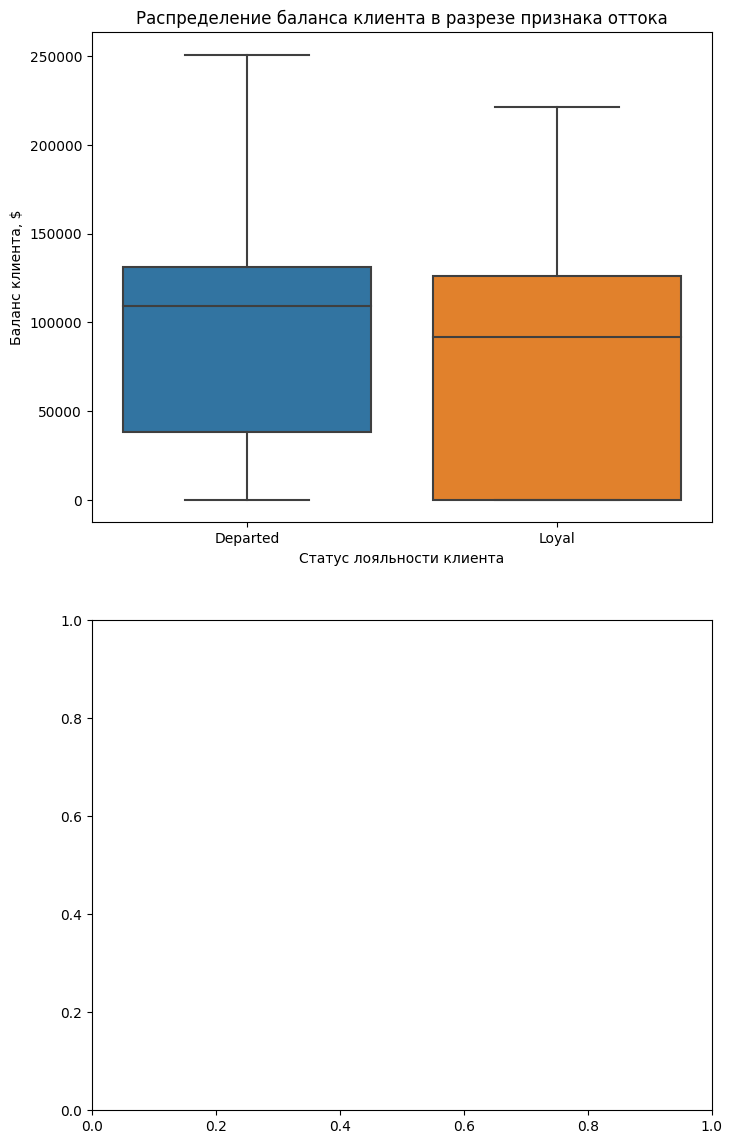

In [32]:
# Создадим фигуры графиков:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))
# График распределения баланса клиента в разрезе признака оттока:
sns.boxplot(
    data=churn_df,
    x='Exited',
    y='Balance',
    ax=axes[0],
)
axes[0].set_title('Распределение баланса клиента в разрезе признака оттока', fontsize=12)
axes[0].set_xlabel('Статус лояльности клиента')
axes[0].set_ylabel('Баланс клиента, $')


# Построим график с условием баланса > 2500 $ для сравнения
sns.boxplot(
    data=balance_df_2,
    x='Exited',
    y='Balance',
    ax=axes[1]
)
axes[1].set_title('Распределение баланса клиента в разрезе признака оттока при условии Balance > 2500', fontsize=12)
axes[1].set_xlabel('Статус лояльности клиента')
axes[1].set_ylabel('Баланс клиента, $');





## Вариант 2

In [ ]:
# Построем графики для сравнения с библиотекой plotly.express:

fig = px.box(
    churn_df,
    x='Exited',
    y='Balance',
    width=1000,
    height=800,
    color="Exited",
    boxmode="overlay", # построим наглядное распределение групп
    points='all',
    color_discrete_sequence=['Tomato', 'LimeGreen'],
    notched=True
)

fig.update_layout(title={
        'text': "Распределение баланса клиента в разрезе признака оттока",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        title_font={
        'size':18,
        'color':"black"
        },
        xaxis_title='Признак оттока',
        yaxis_title='Баланс клиента, тыс. долларов США'
)
fig.show()

# Для точности выводов выведим информацию о клиентах, которые с нулевым балансам покинули банк:

filter_departed = churn_df[(churn_df['Balance']<=2500) & (churn_df['Exited'] == 'Departed')]

print(f'Количество клиентов с нулевым балансом, покинувшие банк: {len(filter_departed)} клиентов')

Количество клиентов с нулевым балансом, покинувшие банк: 500 клиентов


# Выводы


1. Определено, что клиенты имеющие нулевой баланс остаются клиентами банка, это 31,17% клиентов, либо выполняют разовые операции, по движению денежных средств, либо те, кто пользовался банком и просто остался их клиентом забыв об этом (ушло 5% клиентов с нулевым балансом);
2. Визуально показано, что у основной массы ушедших клиентов баланс на счетах варьировался в диапазоне от 37,89 тыс. до 131,43 тыс. долларов США.
3. При исключении клиентов с нулевым балансом (или балансом менее 2500$) ярко выраженной разницы между количеством лояльными и ушедшими клиентами не наблюдается.

На основе полученных результатов нельзя утвердительно сказать, что количество финансов на счету клиентов влияет на отток. Тем более, почти 40% (всего лояльных 7963 чел., нулевой баланс 3117 чел.) оставших клиентов имеют 0 на балансе. Необходимы дополнительные исследования в этом направлении.

### **Задание 9.4.** 

**Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

In [ ]:
fig = px.box(
    churn_df,
    x='Exited',
    y='Age',
    width=800,
    height=900,
    color="Exited",
    boxmode="overlay",
    points='all',
    color_discrete_sequence=['Tomato', 'LimeGreen'],
    notched=True
)

fig.update_layout(title={
        'text': "Распределение возраста клиента в разрезе признака оттока",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        title_font={
        'size':18,
        'color':"black"
        },
        xaxis_title='Признак оттока',
        yaxis_title='Возраст клиента, лет'
)

fig.show()

# Выводы

-  Определено, что молодые клиенты более лояльны к исследуемому банку, и необходимо сместить акцент на тех, кто находится возрастом в диапазоне от 38 до 51 год, так как эта категория находится в большем объеме ушедших клиентов.  Возможно какие-то условия у банка изменяются при достижения определенного возраста, или какая-то психологическая отметка достигается у людей страше 35 лет. Обычно к этому возрасту заканчивается обучения, люди получают высшее образование и потихоньку движутся к реализации своих потребностей, меняя работу и страну проживания. Неплохо бы выяснить их потребности..


### **Задание 9.5.** 

**Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

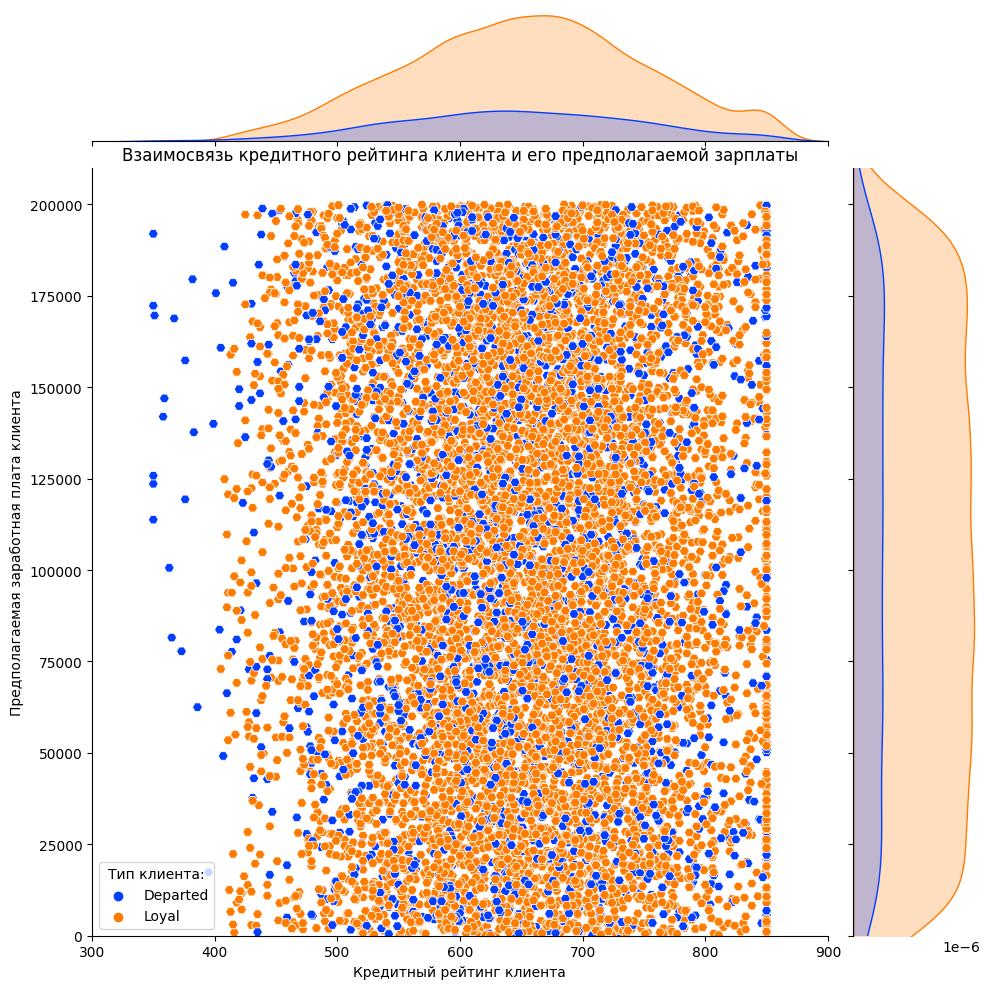

In [ ]:
jointplot = sns.jointplot(
    data=churn_df, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (300, 900),
    ylim = (0, 210000),
    height=10,
    kind='scatter',
    s=50,
    marker ='H',
    palette='bright',
)
plt.xlabel('Кредитный рейтинг клиента')
plt.ylabel('Предполагаемая заработная плата клиента')
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.legend(loc='lower left', title='Тип клиента:');

# Вывод

Явной взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты не прослеживается, ещё один показатель утверждающий, что количество финансов не зависит от оттока клиентов.

### **Задание 9.6.**

**Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

In [ ]:
# Т.к. в churn_df колонка Exited имеет type - categorical, и не сможем воспользоваться mean(),
# мы не будем создавать дополнительных колоноку или менять тип данных, а просто для этого 
# задания используем churn_data_frame

gender_df = churn_data_frame.groupby(['Gender'])['Exited'].mean()

fig = px.bar(
    data_frame=gender_df,
    x=gender_df.index,
    y='Exited',
    labels={'Gender': 'Пол', 'Exited': 'Доля от численности группы, %'},
    color=gender_df.index,
    height=600, #высота
    width=700, #ширина
    title='Доли ушедших клиентов в разрезе пола',
    color_discrete_sequence=['Red', 'RoyalBlue'],
)

fig.update_layout(yaxis_tickformat='.0%') 

fig.update_traces(
    hovertemplate="Отток в группе: %{y:.1%}", #Информация при наведении курсора на колонку
    marker_line_color='black',   # Цвет линии колонки
    marker_line_width=2.5,       # Толщина линии колонки
    opacity=0.75            # Прозрачность колонки
)

fig.show()

# Выведим дополнительную информацию по количеству клиентов в зависимости от гендера:
gender_df = churn_data_frame.groupby(['Gender'])['Exited'].value_counts()
gender_df




Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

# Выводы:
- Определено, что количество женщин ушедших из банка выше чем отток мужчин на 8.6%. А имено, отток клиентов женского пола составил 25.1% (1139 клиентов).
- Определено, что мужской пол является преобладающим среди клиентов банка. Мужчин 5457, а женщин 4543.
Разница оттока по гендерной принадлежности менеее 10%, поэтому нельзя сказать, что пол клиента является значимой причиной ухода из банка 

### **Задание 9.7.**

**Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

# Вариант графика 1

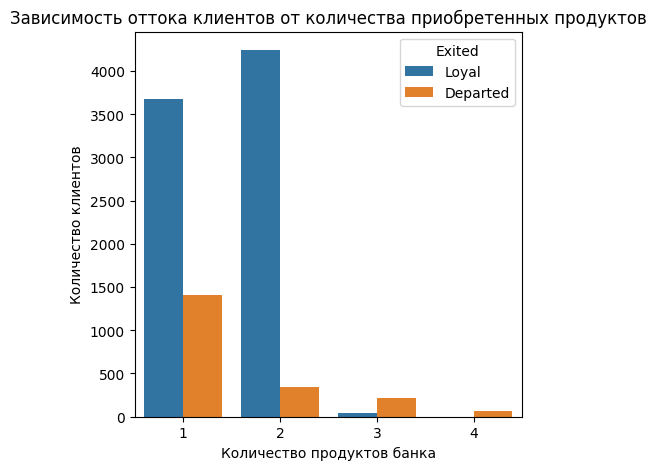

In [ ]:
fig=plt.figure(figsize=(5, 5))
countplot = sns.countplot(
    data=churn_df,
    x=churn_df['NumOfProducts'],
    hue='Exited',
    hue_order=['Loyal', 'Departed']
)
countplot.set_title('Зависимость оттока клиентов от количества приобретенных продуктов')
countplot.set_xlabel('Количество продуктов банка')
countplot.set_ylabel('Количество клиентов');

# Вариант графика 2

In [ ]:
fig = px.histogram(
    churn_df, 
    x="NumOfProducts", 
    color="Exited",
    barmode="stack",
    category_orders={"Exited": ["Loyal", "Departed"]},
    color_discrete_sequence=['Green', 'Red'],
    height=700,
    width=700
)

fig.update_traces(
    hovertemplate="Количество клиентов: %{y}", #Информация при наведении курсора на колонку
    marker_line_color='black',   # Цвет линии колонки
    marker_line_width=2.5,       # Толщина линии колонки
    opacity=0.75            # Прозрачность колонки
)

fig.update_layout(title="Зависимость оттока клиентов от количества приобретенных продуктов",
                  xaxis_title="Количество продуктов банка",
                  yaxis_title="Количество клиентов")
                  
fig.show()

# Выведим доп. информацию по клиентам, которые воспользовались 4-мя продуктами:
filter_four_product = churn_df.loc[churn_df['NumOfProducts'] == 4, ['NumOfProducts', 'Tenure']]
filter_four_product[['Tenure']].value_counts().sort_index()

Tenure
1          4
2         11
3          8
4          3
5          7
6          4
7          5
8          4
9         10
10         4
dtype: int64

# Выводы:
- Исключительно ушедшие клиенты пользовались 4 продуктами банка, при этом в их числе находятся и постоянные клиенты. (Выборка была интересна для определения срока пользования банком, чтобы исключить предположение, что клиенты были одноразовые, которые взяли 4 продукта и сразу ушли). 
По мимо  того, что все клиенты ушли, воспользовавшись 4-мя продуктами, так их по количеству самый минимум, всего 60 клиентов -  это менее 1% клиентов. Может быть есть те продукты которые стоит вовсе исключить из банка? Не плохо было бы определить популярность продуктов. 
Убрать лишнии продукты и направить внимание и финансирование на те, которыми чаще всего пользуются клиенты.
- Основная масса клиентов пользуются 1 - 2 продуктами банка;
- Самое большое количество клиентов ушло воспользовавшись только 1 продуктом, это 1409 клиентов из 2037 ушедших. Возможно они становились клиентами для каких-то разовых операций или, если получить информацию какими именно продуктами пользовались клиенты, можно попробовать определить продукт, после пользования которого уходят клиенты, вывести его плюсы и минусы, модернизировать под клиентов и возможно сократить отток.


### **Задание 9.8.**
**Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

In [ ]:
fig = px.histogram(
    data_frame=churn_df,
    x='IsActiveMember',
    color='Exited',
    color_discrete_sequence=['crimson', 'Green'],
    barmode='group',
    title='Диаграмма зависимости статуса клиента на отток',
    height=700,
    width=700
)

fig.update_layout(
    legend_title_text='Отток',
    xaxis_title='Статус активности клиента',
    yaxis_title='Количество клиентов'
)

fig.update_traces(
    hovertemplate="Количество: %{y}", #Информация при наведении курсора на колонку
    marker_line_color='black',   # Цвет линии колонки
    marker_line_width=2.5,       # Толщина линии колонки
    opacity=0.9            # Прозрачность колонки
)

# Выводы
-  Не активные клиенты покидают банк практически в два раза больше.
Возможно банку необходимо вовлечь клиентов дополнительными условиями и услугами, которые бы повысили активность клиентов и сократили их уход. Но с отличием примерно в 10% между активными и **не** активными количество лояльных клиентов не сильно отличается. 
Вопрос к банку, чем обусловленна активность клиентов? И может быть как-то упростить режим входа в активность клиента - путем упрощения функционала активности, снижая информационную нагрузку на клиента, упрощая и снижая время на проведения банковских операций, при этом увеличить прозрачность этих операций. 

### **Задание 9.9.**

**В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [ ]:
pivot = churn_df.pivot_table(
    values='CustomerId',
    columns='Exited',
    index='Geography',
    aggfunc='count'
)

# Добавляем признак доли ушедших клиентов в % от общего количества.
pivot['ShareDeparted'] = (
    pivot['Departed'] / 
    ((pivot['Departed'] + pivot['Loyal']) / 100)
    ).round(1)

pivot
fig=px.choropleth(
    data_frame=pivot,
    locations=pivot.index,
    locationmode='country names',
    color='ShareDeparted',
    color_continuous_scale='ylorrd',
    title='Отток клиентов по странам (%)',
    scope='europe',
    hover_data={'ShareDeparted': True},
    width=800, 
    height=700,
    labels={'ShareDeparted': 'Доля ушедших клиентов'},
)

fig.show();

- В Германии клиенты уходят в 2 раза чаще чем в соседних странах.
- Общая сумма ушедших клиентов в Германии составила 32% от количества 
Большинство покинувших клиентов банка находятся в Германии, они составили 32% от общей суммы ушедших, это практически 1/3 клиентов в стране. 
Если условия банка в странах везде одинаковое, то возможно это какие-то проблемы внутри страны, которые повлияли на отток клиентов. Интересно было бы сопоставить дату ухода клиента и возможные новости в стране, которые могли повлиять на решения покинуть банк.
Либо уход клиентов возможно в связи с большой конкуренцией в данной стране. Было бы не плохо сравнить количество и качество конкурирующих банков в каждом из регионов для более точных результатов

### **Задание 9.10.**

**Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

```
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```


**Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.**

**На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

churn_data_frame['CreditScoreCat'] = churn_data_frame['CreditScore'].apply(
    get_credit_score_cat).astype('category')


fig = px.density_heatmap(
    data_frame=churn_data_frame,
    x='Tenure',
    y='CreditScoreCat',
    z='Exited',
    
    category_orders=dict(
        CreditScoreCat=[
            'Excellent', 'Good', 'Fair', 'Poor', 'Very_Poor'
        ]
    ),
    
    labels=dict(
        Tenure='Продолжительность сотрудничества с банком (годы)',
        CreditScoreCat='Кредитный рейтинг',
    ),
    
    color_continuous_scale='Inferno_r',  
    histfunc='avg',  
    title="Тепловая карта оттока клиентов по категориям",
    template='none',  
    width=800,
    height=600,
    text_auto = '.0%'
)

fig.update_layout(
    autosize=False,  # автоматический размер откл.
    xaxis_dtick=1,  # шаг тиков на оси x
    # Настройка легенды (colorbar)
    coloraxis_colorbar=dict(
        title=dict(
            text='Интенсивность оттока',
            side='bottom'
        ),
        orientation='h',
        x=0.5,
        y=-0.4,
        len=1,
        tickformat='.0%',
        ypad=20,  # отступ снизу
        dtick=0.1  # шаг тиков
    ),
    # Настройка отступов графика
    margin=dict(
       autoexpand=False,
       t=50,
       b=150,
       r=20,
    ), 
)

# Настройка шаблона наведения курсора мыши
fig.update_traces(
    hovertemplate="Отток %{z:.0%}"
)


fig.show()

# Выведим дополнительную информацию по таблице:
churn_data_frame.pivot_table(index='CreditScoreCat', columns='Exited', values='Tenure', aggfunc='count')


Exited,0,1
CreditScoreCat,,
Excellent,763,187
Fair,1811,470
Good,2988,715
Poor,1919,515
Very_Poor,482,150


# Выводы:

- Если рассматривать по кредитным рейтингам, то клиенты с кредитным рейтингом Veru_Poor покидают чаще, так к примеру прибывавшие в качестве клиента банка менее года составляют отток 44%. Но не смотря на такую частоту оттока в кредитный рейтинг Veru_Porr входит самое минимальное количество ушедших клиентов.
- Вторым по частоте оттока в сегменте кредитного рейтинга, выходят клиенты с отличным кредитным рейтингом (**Excellent**). 
- Основная масса ушедших клиентов находится в трёх сегментах крединтного рейтинга, это **Poor, Fair, Good**, при этом максимальное число ушедших приходится на хороший показатель кредитного рейтинга (**Good**). Среди этих трёх сегментов, нет ярко выделенной зависимости от срока сотрудничества с банком.

# Тезисные итоги разведывательного анализа:
1. Количество клиентов ушедших из банка составляет 20.4 % от общего количества клиентов;
1. Большая часть клиентов 36,17 % имеют пустые счета. Основная масса клиентов имеют на счетах от 100 000 до 140 000$;
1. Количество финансов на счету клиентов не сильно влияет на отток;
1. Чаще всего покидают банк клиенты возрастом в диапозоне от 38 лет до 51 года;
1. Количество заработной платы не влияет на отток;
1. Гендерная принадлежность сильно не влияет на отток, но в сравнении с мужчинами женщины покидают банк чаще.
1. Основная масса клиентов пользуется 1 - 2 продуктами банка;
1. Среди активности клиентов можно выделить то, что **не** активные клиенты перестают быть клиентами банка в два раза чаще.
1. Частота оттока клиентов на Германию приходится в 2 раза чаще, чем в соседних странах;
1. На средний сегмент кредитного рейтинга приходится болешее количество ушедших клиентов.

# На что стоит обратить внимание и какими вопросами заняться банку:
- Сократить количество продуктов и увеличить их качество, на которые приходится большая часть клиентов банка;
- Выявить какие проблемы возникли в Германии, или в чём разница условий и отношения к клиентам в этой стране;
- Увеличить активность клиентов;
- Улучшить условия банка для клиентов кредитного рейтинга в сегментах **Poor, Fair, Good**.

